Accuracy : 0.4603


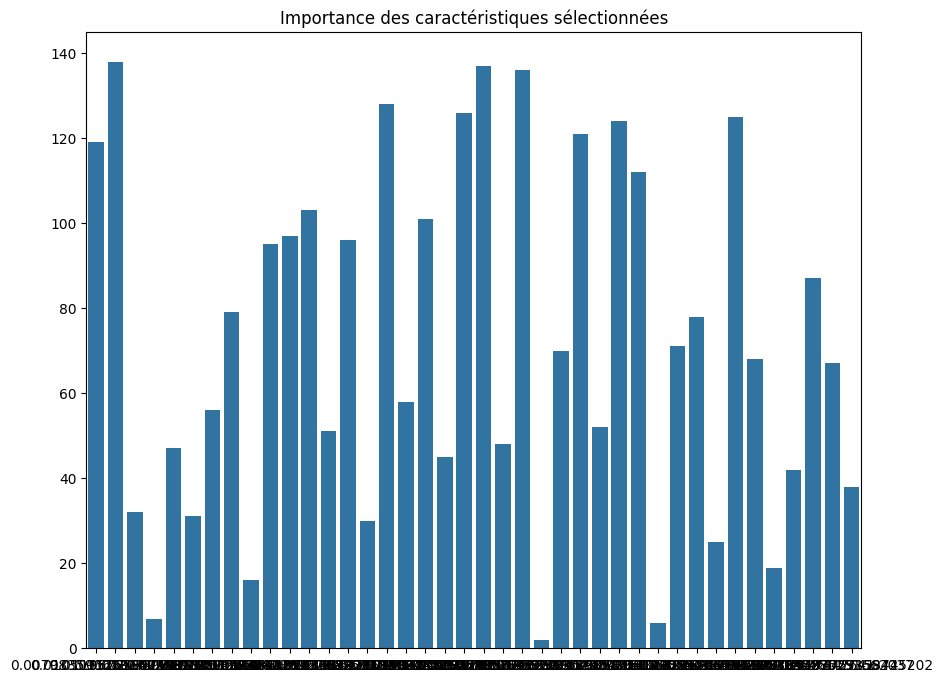

In [3]:
# 1. Importation des bibliothèques nécessaires
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
import random
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Chargement du dataset
# Remplace ceci par le chargement réel de ton dataset
# X = pd.read_csv("ton_dataset.csv")  # Exemple de chargement des données
# y = X.pop('target')  # Remplacer 'target' par le nom de la colonne de la cible

# 3. Prétraitement des données : Normalisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Fonction de Recherche Taboue pour la réduction des caractéristiques
def tabou_search(X, y, num_features=40, max_iter=100):
    best_features = list(X.columns)
    best_score = 0
    tabu_list = []
    for _ in range(max_iter):
        # Sélectionner aléatoirement un sous-ensemble de caractéristiques
        current_features = random.sample(X.columns.tolist(), num_features)
        # Entraîner un modèle et évaluer sa performance
        X_subset = X[current_features]
        model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(X_subset, y)
        score = accuracy_score(y, model.predict(X_subset))
        
        # Mettre à jour les meilleurs résultats si nécessaire
        if score > best_score:
            best_score = score
            best_features = current_features
        # Ajouter la solution courante à la liste tabou
        tabu_list.append(current_features)
        if len(tabu_list) > 10:
            tabu_list.pop(0)
    
    return best_features

# 5. Appliquer la recherche taboue
tabou_features = tabou_search(X, y, num_features=40)  # Par exemple, réduire à 40 caractéristiques

# 6. Appliquer RFE pour affiner les caractéristiques sélectionnées
X_tabou = X[tabou_features]

# Diviser en jeu de formation et de test
X_train, X_test, y_train, y_test = train_test_split(X_tabou, y, test_size=0.2, random_state=42)

# 7. Entraînement du modèle avec RandomForest ou un autre modèle (par exemple, GradientBoosting)
model = GradientBoostingClassifier(n_estimators=100, random_state=42)  # Utilisation de Gradient Boosting pour de meilleures performances
model.fit(X_train, y_train)

# 8. Prédictions et évaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy : {accuracy:.4f}")

# 9. Visualisation de l'importance des caractéristiques
plt.figure(figsize=(10, 8))
sns.barplot(x=model.feature_importances_, y=tabou_features)
plt.title("Importance des caractéristiques sélectionnées")
plt.show()
